### imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Generate Leaky Integrate-and-Fire Model

In [11]:
def lif_model(time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, I = 0, Alternative = False, startRange = 0, endRange = 0):
    tau_m = Rm*Cm
    Vm = np.zeros(len(time))
    IRange = []
    if (Alternative):
        for i, t in enumerate(time):
            tempRandI = random.randrange(startRange, endRange)
            IRange.append(tempRandI)
            if t > t_rest:
                Vm[i] = Vm[i-1] + (-Vm[i-1] + tempRandI*Rm) / tau_m * dt
            if Vm[i] >= Vth:
                Vm[i] += V_spike
                t_rest = t + tau_ref 
    else:
        for i, t in enumerate(time):
            IRange.append(I)
            if t > t_rest:
                Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
            if Vm[i] >= Vth:
                Vm[i] += V_spike
                t_rest = t + tau_ref
    return time, Vm, IRange

### Plot LIF

In [12]:
def plot_lif(model):
    [time, Vm, _] = model
    # plot membrane potential trace
    plt.plot(time, Vm)
    plt.title('Leaky Integrate-and-Fire')
    plt.ylabel('U(V)')
    plt.xlabel('Time (msec)')
    plt.show()

### Dwar I - T Plot

In [13]:
def plot_i_t(model):
    [time, _, IRange] = model
    plt.plot(time, IRange)
    plt.title('I and Time')
    plt.ylabel('I(A)')
    plt.xlabel('Time (msec)')
    plt.show()

### Draw F - I Plot

In [24]:
def draw_f_i(time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, I):
    Vm = np.zeros(len(time))
    tau_m = Rm*Cm # time constant (msec)
    f = []
    i_s = []
    for j in np.arange(1, 3, 0.1):
        counter = 0
        for i, t in enumerate(time):
            if t > t_rest:
                Vm[i] = Vm[i-1] + (-Vm[i-1] + j*Rm) / tau_m * dt
            if Vm[i] >= Vth:
                Vm[i] += V_spike
                t_rest = t + tau_ref
                if(counter == 1):
                    f.append(1/t)
                    i_s.append(j)
                counter += 1

    #frequancy plot
    plt.plot(i_s, f)
    plt.title('frequency')
    plt.ylabel('F')
    plt.xlabel('I(A)')
    plt.show()

### Create Model

In [25]:
T = 50 # total time to simulate (msec)
dt = 0.125 # simulation time step (msec)
time = np.arange(0, T+dt, dt) # time array
t_rest = 0 # initial refractory time
Rm = 1 # resistance (kOhm)
Cm = 10 # capacitance (uF)
tau_ref = 4 # refractory period (msec)
Vth = 1 # spike threshold (V)
V_spike = 0.5 # spike delta (V)
I = 1.5 # input current (A)

model = lif_model(time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, I )

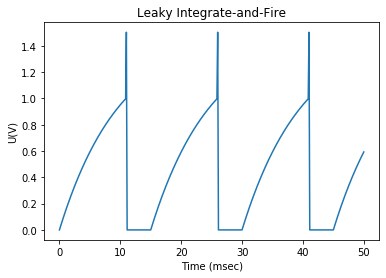

In [26]:
plot_lif(model)

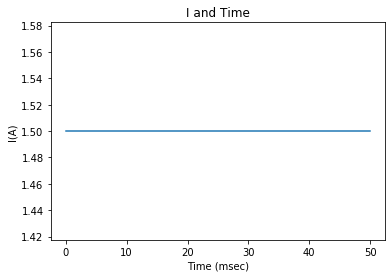

In [27]:
plot_i_t(model)

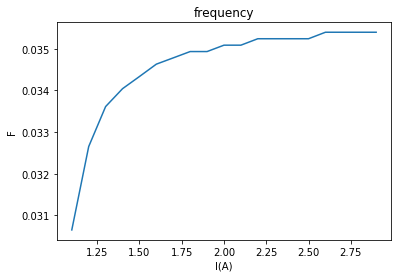

In [28]:
draw_f_i(time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, I )

In [29]:
model_alt = lif_model(time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, Alternative=True, startRange=1, endRange=5)

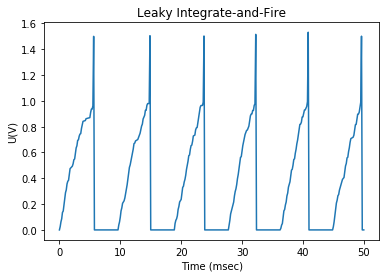

In [30]:
plot_lif(model_alt)

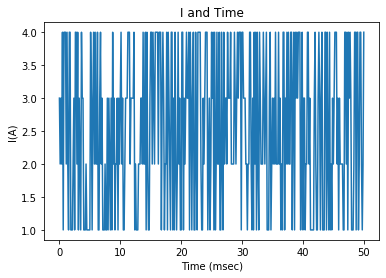

In [31]:
plot_i_t(model_alt)